# **DATA MINING FINAL PROJECT**

#### **ANALYSIS ON DATA DEVELOPER SALARIES IN 2024**

The 2024 dataset on data developer salaries and employment attributes offers valuable insights into the evolving landscape of data developers. It includes key variables such as salary, job title, experience level, employment type, employee residence, remote work ratio, company location, and company size.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE

In [2]:
conn = sqlite3.connect(r'D:\Programming\Python\data-mining\salary2024.db')
df = pd.read_sql_query("SELECT * FROM software_engineer", conn)

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730.0,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118.0,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500.0,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000.0,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000.0,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16246,2021,SE,FT,Data Specialist,165000.0,USD,165000,US,100,US,L
16247,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,100,US,L
16248,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,100,US,S
16249,2020,EN,CT,Business Data Analyst,100000.0,USD,100000,US,100,US,L


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730.0,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118.0,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500.0,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000.0,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000.0,USD,190000,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           16251 non-null  int64  
 1   experience_level    16251 non-null  object 
 2   employment_type     16251 non-null  object 
 3   job_title           16251 non-null  object 
 4   salary              16251 non-null  float64
 5   salary_currency     16251 non-null  object 
 6   salary_in_usd       16251 non-null  int64  
 7   employee_residence  16251 non-null  object 
 8   remote_ratio        16251 non-null  int64  
 9   company_location    16251 non-null  object 
 10  company_size        16251 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16251.000000,1.625100e+04,16251.000000,16251.000000
mean,2023.223802,1.597289e+05,145479.622362,32.222632
std,0.713606,3.413695e+05,59413.294492,46.329335
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.000000e+05,100000.000000,0.000000
50%,2023.000000,1.401000e+05,140000.000000,0.000000
75%,2024.000000,1.850000e+05,184950.000000,100.000000
max,2024.000000,3.040000e+07,313000.000000,100.000000


### **Distribution of Salary in USD**

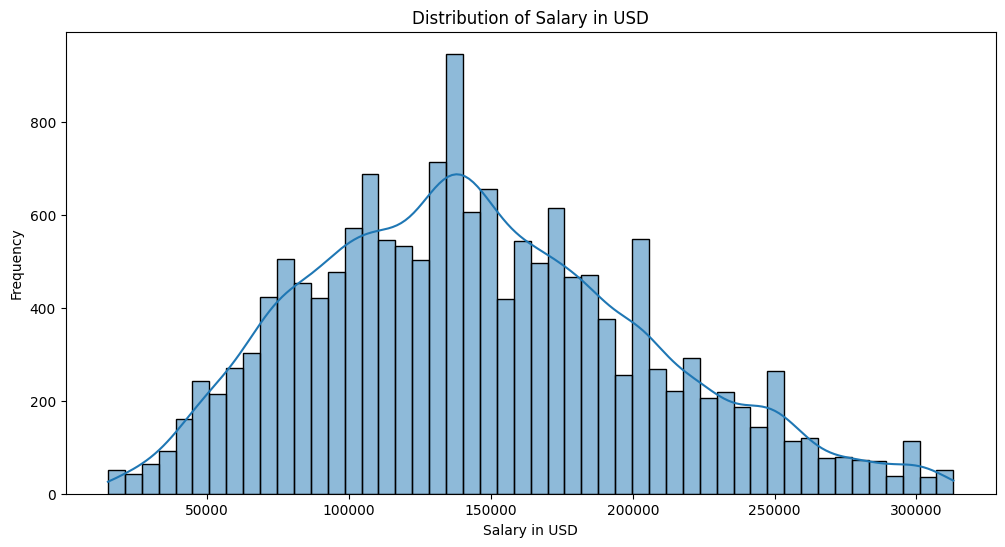

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

The histrogram shows that the distribution of salaries in USD is right-skewed, with most salaries clustering around the lower end and a long tail towards higher salaries.

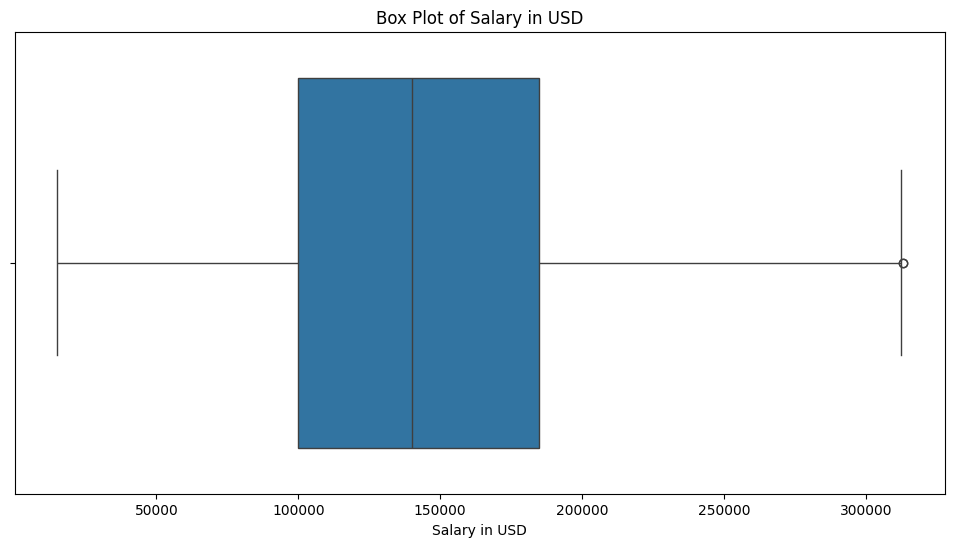

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Box Plot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()

### **Unique in each Column**

In [9]:
unique_values_counts = {}
for column in df.columns:
    unique_values_counts[column] = df[column].value_counts()
for column, values_counts in unique_values_counts.items():
    print(f"Unique values and counts for column '{column}':\n{values_counts}\n")

Unique values and counts for column 'work_year':
work_year
2023    8386
2024    5931
2022    1646
2021     216
2020      72
Name: count, dtype: int64

Unique values and counts for column 'experience_level':
experience_level
SE    10459
MI     3998
EN     1323
EX      471
Name: count, dtype: int64

Unique values and counts for column 'employment_type':
employment_type
FT    16173
PT       38
CT       26
FL       14
Name: count, dtype: int64

Unique values and counts for column 'job_title':
job_title
Data Engineer                3446
Data Scientist               3279
Data Analyst                 2434
Machine Learning Engineer    1639
Research Scientist            496
                             ... 
Deep Learning Researcher        1
BI Data Engineer                1
Marketing Data Engineer         1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 153, dtype: int64

Unique values and counts for column 'salary':
salary
150000.0     349
100000.0    

## EDA

#### **Salary Trend over the Years**

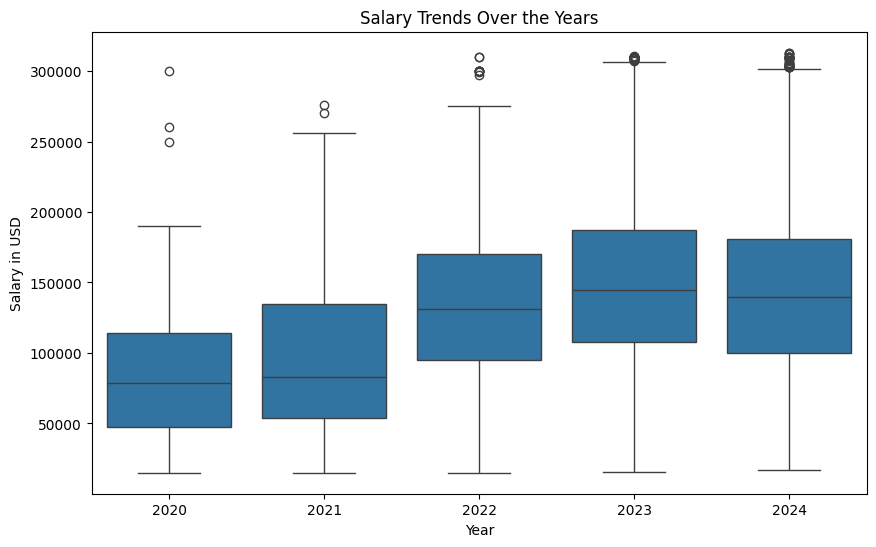

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.show()

#### **Company Salaries by Experience Level**

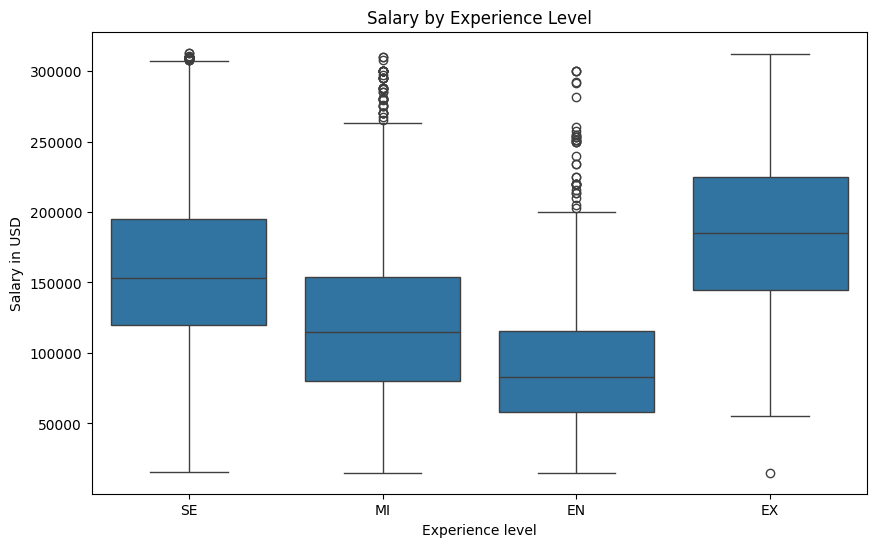

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.show()

#### **Company Salaries by Employment Type**

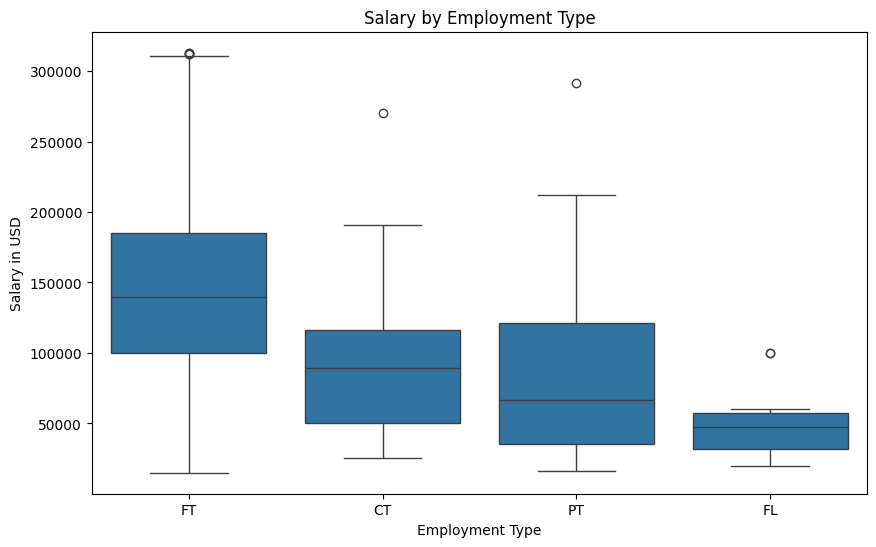

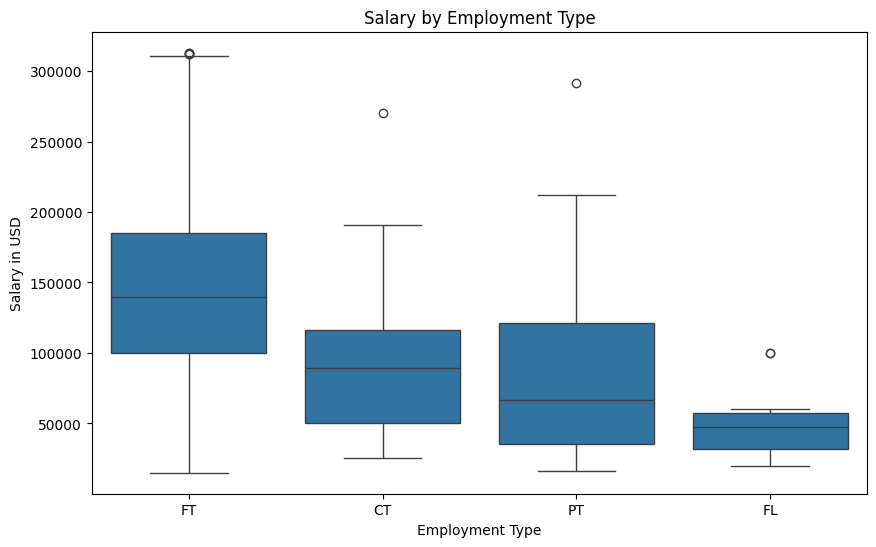

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

#### **Company Salaries by Job Title**

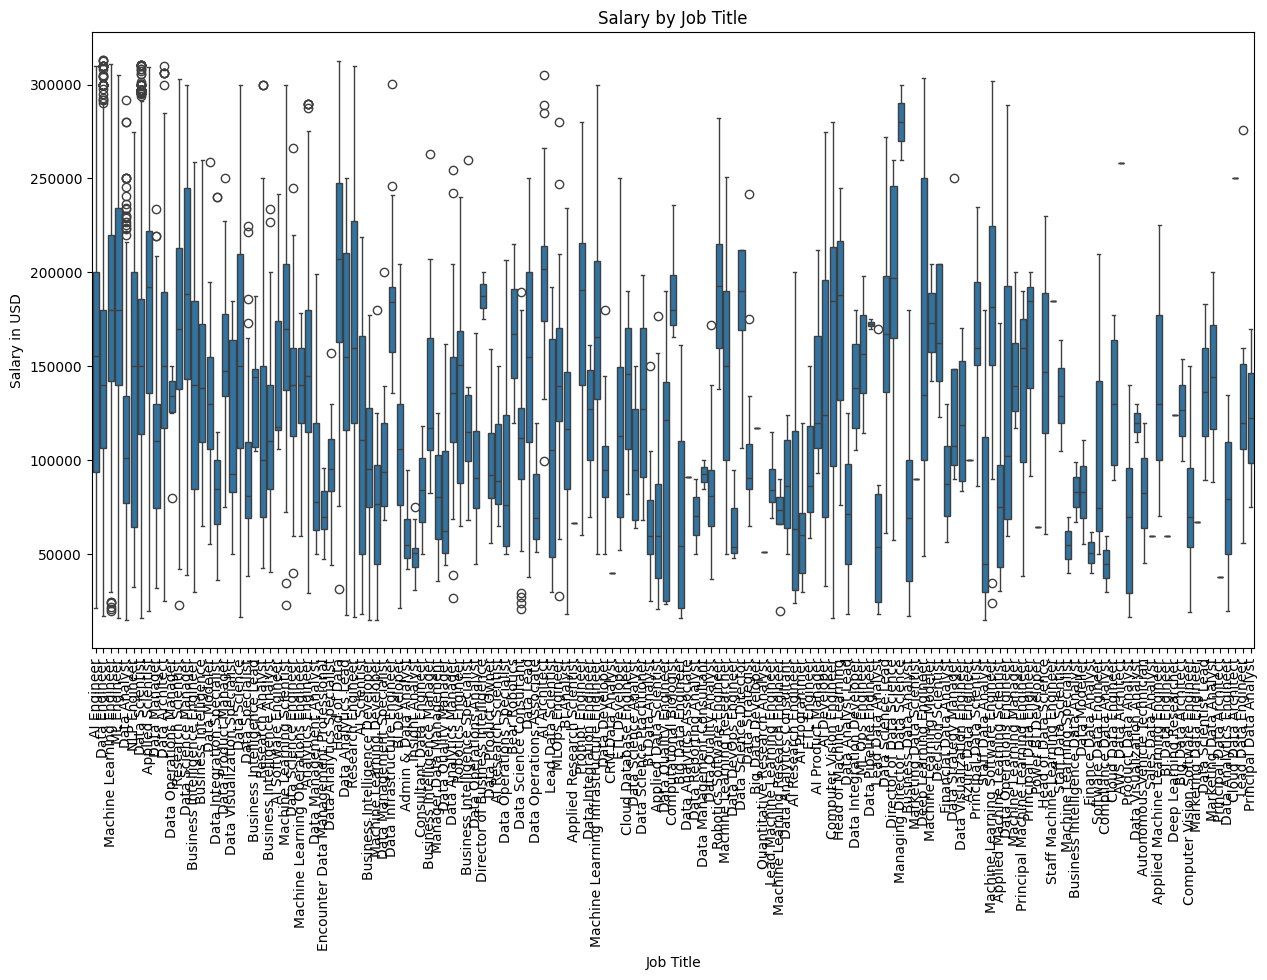

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)
plt.show()

#### **Company Salaries by Remote Ratio**

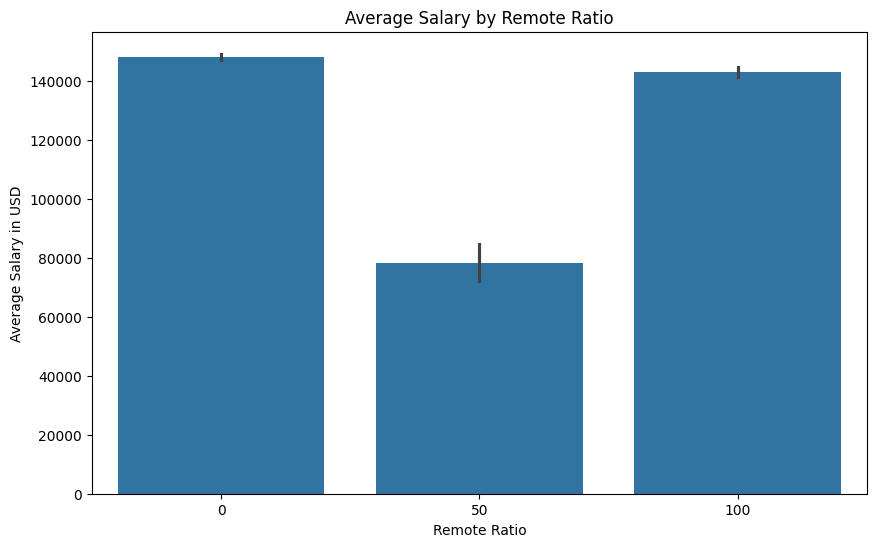

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary in USD')
plt.show()

#### **Company Salaries by Company Size**

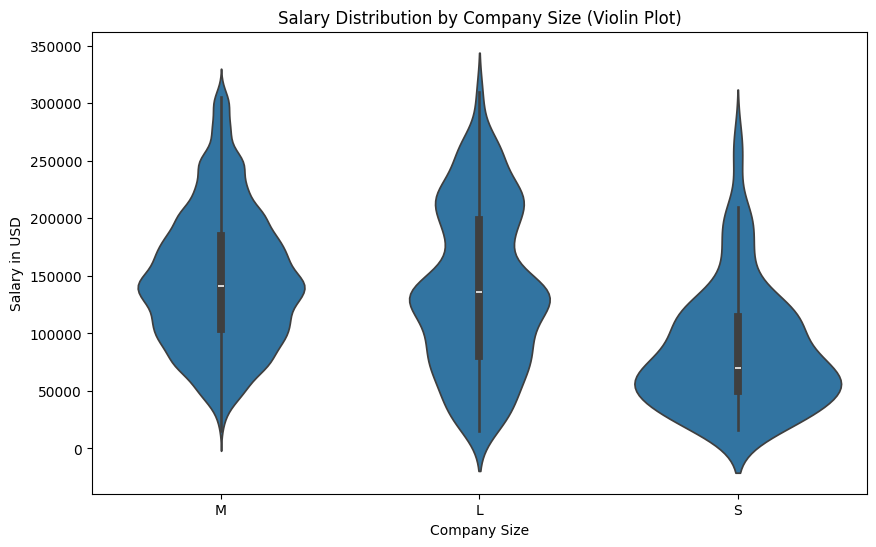

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size (Violin Plot)')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

### **DATA PREPROCESSING**

In [16]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [17]:
X=df.drop('salary_in_usd',axis=1)
y=df.salary_in_usd

In [18]:
categorical_features=X.select_dtypes(include=['object']).columns.tolist()
numerical_features=X.select_dtypes(include=[np.number]).columns.tolist()

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

##### **Preprocess Data with One-Hot Encoding and Ordinal Encoding**

In [21]:
one_hot_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', ordinal_encoder, categorical_features)])

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [23]:
results = {}

In [24]:
one_hot_results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', one_hot_preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    y_test_pred = pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    one_hot_results[name] = (mae_val, mae_test)

results['One-Hot Encoding'] = one_hot_results

In [25]:
ordinal_results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', ordinal_preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    y_test_pred = pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    ordinal_results[name] = (mae_val, mae_test)

results['Ordinal Encoding'] = ordinal_results

In [26]:
for encoding_method, encoding_results in results.items():
    print(f"Results for {encoding_method}:")
    for model_name, (mae_val, mae_test) in encoding_results.items():
        print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")

Results for One-Hot Encoding:
Linear Regression - Validation MAE: 32066.6926, Test MAE: 31871.1018
Random Forest - Validation MAE: 338.5356, Test MAE: 383.0273
Results for Ordinal Encoding:
Linear Regression - Validation MAE: 40965.9143, Test MAE: 40705.7776
Random Forest - Validation MAE: 330.1747, Test MAE: 381.7432


### **Feature Selection**

In [27]:
best_encoding_preprocessor = ordinal_preprocessor
fs_results={}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', best_encoding_preprocessor),
        ('feature_selection', RFE(model, n_features_to_select=10)),  # Number of features to select
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    y_test_pred = pipeline.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    fs_results[name] = (mae_val, mae_test)

print("Results after feature selection:")
for model_name, (mae_val, mae_test) in fs_results.items():
    print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")
    print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")

Results after feature selection:
Linear Regression - Validation MAE: 40965.9143, Test MAE: 40705.7776
Linear Regression - Validation MAE: 40965.9143, Test MAE: 40705.7776
Random Forest - Validation MAE: 330.1747, Test MAE: 381.7432
Random Forest - Validation MAE: 330.1747, Test MAE: 381.7432


### **Hyperparameter Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline(steps=[
    ('preprocessor', ordinal_preprocessor),
    ('feature_selection', RFE(RandomForestRegressor(random_state=42), n_features_to_select=10)),
    ('model', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_model = grid_search.best_estimator_


y_val_pred = best_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
y_test_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Validation MAE: {mae_val:.4f}")
print(f"Test MAE: {mae_test:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Validation MAE: 331.7781
Test MAE: 379.9741


### **Cross-Validation**

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_val, y_train_val, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
cv_mae = -cv_scores.mean()

print(f"Cross-Validation MAE: {cv_mae:.4f}")

Cross-Validation MAE: 399.8969


### **Extract Feature Importances**

In [30]:
feature_importances = best_model.named_steps['model'].feature_importances_

selected_features = [X.columns[i] for i in range(len(X.columns)) if best_model.named_steps['feature_selection'].support_[i]]

feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

              Feature  Importance
1    experience_level    0.964764
6  employee_residence    0.032061
7        remote_ratio    0.000685
8    company_location    0.000590
9        company_size    0.000452
5     salary_currency    0.000444
0           work_year    0.000395
4              salary    0.000313
3           job_title    0.000163
2     employment_type    0.000133


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Additional Results after feature selection:")
for model_name, (mae_val, mae_test) in fs_results.items():
    print(f"{model_name} - Validation MAE: {mae_val:.4f}, Test MAE: {mae_test:.4f}")
    print(f"{model_name} - Validation RMSE: {rmse_val:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"{model_name} - Validation R-squared: {r2_val:.4f}, Test R-squared: {r2_test:.4f}")

Additional Results after feature selection:
Linear Regression - Validation MAE: 40965.9143, Test MAE: 40705.7776
Linear Regression - Validation RMSE: 3959.2746, Test RMSE: 4576.6372
Linear Regression - Validation R-squared: 0.9955, Test R-squared: 0.9938
Random Forest - Validation MAE: 330.1747, Test MAE: 381.7432
Random Forest - Validation RMSE: 3959.2746, Test RMSE: 4576.6372
Random Forest - Validation R-squared: 0.9955, Test R-squared: 0.9938


C:\Users\Malcolm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Malcolm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


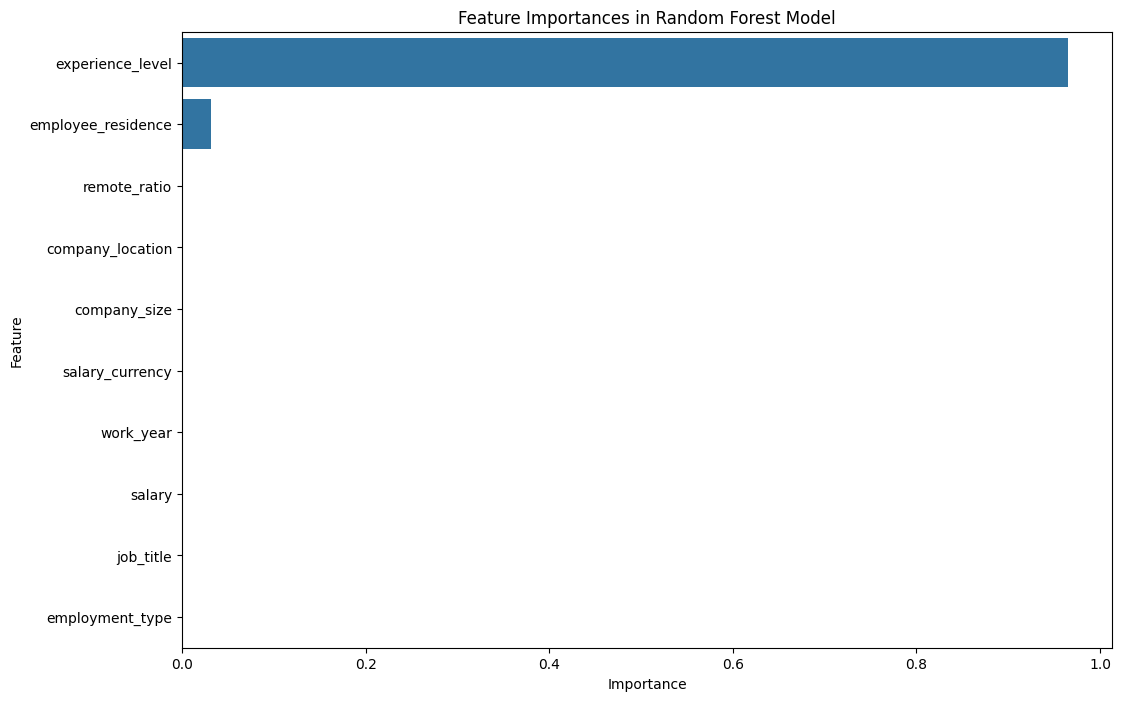

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

**Linear Regression:**
- Validation R-squared: 0.9955
- Test R-squared: 0.9938 

**Random Forest**
- Validation R-squared: 0.9955
- Test R-squared: 0.9938

The R-squared metric is a measure of the proportion of the variance in the target variable that is predictable from the independent variables. An R-squared value close to 1 indicates the model is explaining a large portion of the variance.

In this case, both the Linear Regression and Random Forest models have very high R-squared values, above 0.99, on both the validation and test sets. This suggests the models are able to explain over 99% of the variance in the target variable.

The near-identical R-squared values for the two models also indicates they have similar overall predictive accuracy and goodness-of-fit.

In addition to the R-squared, you can also look at the RMSE (Root Mean Squared Error) values:

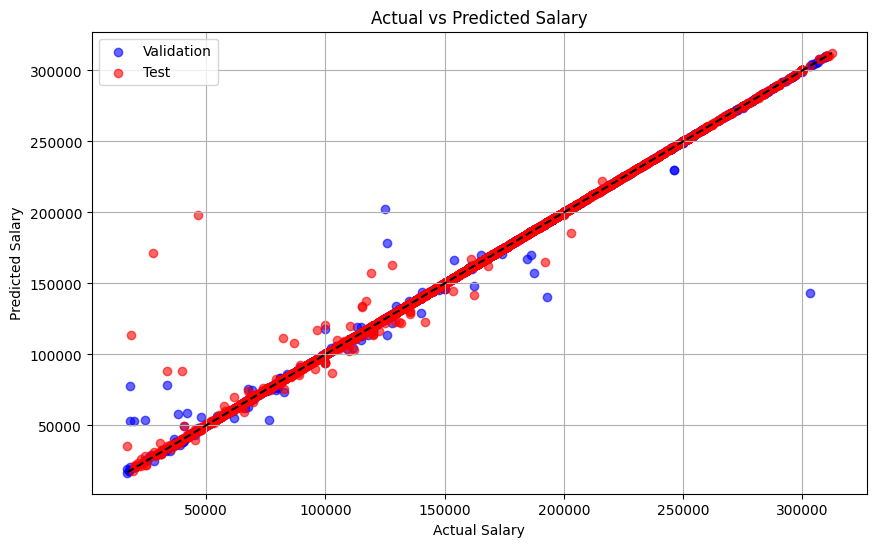

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='b', label='Validation')
plt.scatter(y_test, y_test_pred, alpha=0.6, color='r', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

- **Blue Dots (Validation)**: These represent the predicted salaries versus actual salaries for the validation set.

- **Red Dots (Test)**: These represent the predicted salaries versus actual salaries for the test set.

- **Diagonal Black Line**: This line represents the ideal scenario where the predicted salaries match the actual salaries perfectly (i.e., predicted = actual).

### **ANALYSIS**

1. **Close Alignment to Diagonal Line:**
- Many points lie close to the diagonal black line, indicating that the model’s predictions are quite accurate for those data points.

- The closer the points are to the diagonal line, the better the model’s predictions.

2. **Spread of Points**
- There is some spread around the diagonal line, indicating instances where the model’s predictions deviate from the actual salaries.
- Points far from the diagonal line represent larger prediction errors

3. **Validation vs. Test Set Performance**
- Both validation (blue) and test (red) points follow a similar pattern, which suggests that the model generalizes well to unseen data.
- The test set points being close to the validation set points and the diagonal line indicates consistent model performance.

4. **Outliers**
- Some points, particularly in the lower range of salaries, are significantly off the diagonal line. These outliers suggest that the model struggles with predicting very low or high salary values accuratel